In [1]:
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

In [48]:
#update to W
def l1_mult_update(X, W, H): 
    m,n = np.shape(X)
    _,k = np.shape(W)
    
    X_approx = W@H
    res_mat = np.abs(X - X_approx)
    
    new_W = np.zeros(np.shape(W))
    for s in range(m):
        for t in range(k):
            if res_mat[s,t] == 0:
                print(s,t)
            #new_W[s,t] = W[s,t]*np.sum(X[s,:]/(res_mat[s,:]))/(np.sum(X_approx[s,:]*H[t,:]/(res_mat[s,:]+1e-10))+1e-10)
            denom1 = np.maximum(1e-10,np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            term2 = np.maximum(1e-10,np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])]))
            #term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
            new_W[s, t] = (W[s, t]/denom1)*(term2)
            #if denom1 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has denom1 = 0.")
            #if term2 < 1e-6:
            #    print ("here")
            #    print ("entry", s, t, "has term2 = 0.")
            
    return new_W

In [44]:
def l1_mult_updates(X,k,max_iter,W,H):
    m,n = np.shape(X)
    #W = np.random.rand(m,k)
    #H = np.random.rand(k,n)
    
    for t in range(max_iter):
        print("iteration",t)
        W = l1_mult_update(X,W,H)
        H = l1_mult_update(X.transpose(),H.transpose(),W.transpose()).transpose()
        
    return W,H

In [10]:
X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

print(np.linalg.norm(X-W@H,1))

W,H = l1_mult_updates(X,k,10,W,H)

print(np.linalg.norm(X-W@H,1))

3213.5599478822674
264.48232045233686


In [11]:
errs = []

X = np.random.rand(1000,100)
k = 10

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 10

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

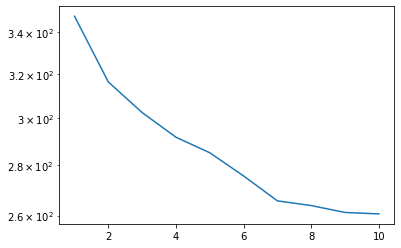

In [12]:
plt.semilogy(range(1,num_iters+1),errs)

In [13]:
errs = []

k = 10
X = np.random.rand(1000,k)@np.random.rand(k,100)

W = np.random.rand(1000,k)
H = np.random.rand(k,100)

num_iters = 100

for i in range(num_iters):
    W,H = l1_mult_updates(X,k,1,W,H)

    errs.append(np.linalg.norm(X-W@H,1))

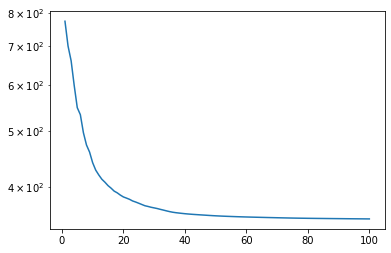

In [14]:
plt.semilogy(range(1,num_iters+1),errs)

## Sanity Checks

In [49]:
errs = []
k = 10
W_opt = np.random.rand(1000,k)
H_opt = np.random.rand(k,100)

X = W_opt@H_opt

init_noise = 1e-10

#W = W_opt + init_noise*(np.random.rand(1000,k)<0.1)
#H = H_opt + init_noise*(np.random.rand(k,100)<0.1)

W_opt[2, 5] += .05
#H_opt [5, 25] += .1

num_iters = 15

for i in range(num_iters):
    W_opt,H_opt = l1_mult_updates(X,k,1,W_opt,H_opt)
    #if denom1 == 1e-10:
     #   print ("entry", s, t, "has denom1 = 0.")
    #if term2 == 1e-10:
     #   print ("entry", s, t, "has term2 = 0.")
        

    errs.append(np.linalg.norm(X-W_opt@H_opt,1))

iteration 0
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
14 0
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
16 0
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
17 0
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
18 0
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
21 0
21 1
21 2
21 3
21 4
21 5
21 6
21 7
21 8
21 9
22 0
22 1
22 2
22 3
22 4
22 

167 7
167 8
167 9
168 0
168 1
168 2
168 3
168 4
168 5
168 6
168 7
168 8
168 9
169 0
169 1
169 2
169 3
169 4
169 5
169 6
169 7
169 8
169 9
170 0
170 1
170 2
170 3
170 4
170 5
170 6
170 7
170 8
170 9
171 0
171 1
171 2
171 3
171 4
171 5
171 6
171 7
171 8
171 9
172 0
172 1
172 2
172 3
172 4
172 5
172 6
172 7
172 8
172 9
173 0
173 1
173 2
173 3
173 4
173 5
173 6
173 7
173 8
173 9
174 0
174 1
174 2
174 3
174 4
174 5
174 6
174 7
174 8
174 9
175 0
175 1
175 2
175 3
175 4
175 5
175 6
175 7
175 8
175 9
176 0
176 1
176 2
176 3
176 4
176 5
176 6
176 7
176 8
176 9
177 0
177 1
177 2
177 3
177 4
177 5
177 6
177 7
177 8
177 9
178 0
178 1
178 2
178 3
178 4
178 5
178 6
178 7
178 8
178 9
179 0
179 1
179 2
179 3
179 4
179 5
179 6
179 7
179 8
179 9
180 0
180 1
180 2
180 3
180 4
180 5
180 6
180 7
180 8
180 9
181 0
181 1
181 2
181 3
181 4
181 5
181 6
181 7
181 8
181 9
182 0
182 1
182 2
182 3
182 4
182 5
182 6
182 7
182 8
182 9
183 0
183 1
183 2
183 3
183 4
183 5
183 6
183 7
183 8
183 9
184 0
184 1
184 2
184 

334 6
334 7
334 8
334 9
335 0
335 1
335 2
335 3
335 4
335 5
335 6
335 7
335 8
335 9
336 0
336 1
336 2
336 3
336 4
336 5
336 6
336 7
336 8
336 9
337 0
337 1
337 2
337 3
337 4
337 5
337 6
337 7
337 8
337 9
338 0
338 1
338 2
338 3
338 4
338 5
338 6
338 7
338 8
338 9
339 0
339 1
339 2
339 3
339 4
339 5
339 6
339 7
339 8
339 9
340 0
340 1
340 2
340 3
340 4
340 5
340 6
340 7
340 8
340 9
341 0
341 1
341 2
341 3
341 4
341 5
341 6
341 7
341 8
341 9
342 0
342 1
342 2
342 3
342 4
342 5
342 6
342 7
342 8
342 9
343 0
343 1
343 2
343 3
343 4
343 5
343 6
343 7
343 8
343 9
344 0
344 1
344 2
344 3
344 4
344 5
344 6
344 7
344 8
344 9
345 0
345 1
345 2
345 3
345 4
345 5
345 6
345 7
345 8
345 9
346 0
346 1
346 2
346 3
346 4
346 5
346 6
346 7
346 8
346 9
347 0
347 1
347 2
347 3
347 4
347 5
347 6
347 7
347 8
347 9
348 0
348 1
348 2
348 3
348 4
348 5
348 6
348 7
348 8
348 9
349 0
349 1
349 2
349 3
349 4
349 5
349 6
349 7
349 8
349 9
350 0
350 1
350 2
350 3
350 4
350 5
350 6
350 7
350 8
350 9
351 0
351 1
351 

475 1
475 2
475 3
475 4
475 5
475 6
475 7
475 8
475 9
476 0
476 1
476 2
476 3
476 4
476 5
476 6
476 7
476 8
476 9
477 0
477 1
477 2
477 3
477 4
477 5
477 6
477 7
477 8
477 9
478 0
478 1
478 2
478 3
478 4
478 5
478 6
478 7
478 8
478 9
479 0
479 1
479 2
479 3
479 4
479 5
479 6
479 7
479 8
479 9
480 0
480 1
480 2
480 3
480 4
480 5
480 6
480 7
480 8
480 9
481 0
481 1
481 2
481 3
481 4
481 5
481 6
481 7
481 8
481 9
482 0
482 1
482 2
482 3
482 4
482 5
482 6
482 7
482 8
482 9
483 0
483 1
483 2
483 3
483 4
483 5
483 6
483 7
483 8
483 9
484 0
484 1
484 2
484 3
484 4
484 5
484 6
484 7
484 8
484 9
485 0
485 1
485 2
485 3
485 4
485 5
485 6
485 7
485 8
485 9
486 0
486 1
486 2
486 3
486 4
486 5
486 6
486 7
486 8
486 9
487 0
487 1
487 2
487 3
487 4
487 5
487 6
487 7
487 8
487 9
488 0
488 1
488 2
488 3
488 4
488 5
488 6
488 7
488 8
488 9
489 0
489 1
489 2
489 3
489 4
489 5
489 6
489 7
489 8
489 9
490 0
490 1
490 2
490 3
490 4
490 5
490 6
490 7
490 8
490 9
491 0
491 1
491 2
491 3
491 4
491 5
491 6
491 

618 3
618 4
618 5
618 6
618 7
618 8
618 9
619 0
619 1
619 2
619 3
619 4
619 5
619 6
619 7
619 8
619 9
620 0
620 1
620 2
620 3
620 4
620 5
620 6
620 7
620 8
620 9
621 0
621 1
621 2
621 3
621 4
621 5
621 6
621 7
621 8
621 9
622 0
622 1
622 2
622 3
622 4
622 5
622 6
622 7
622 8
622 9
623 0
623 1
623 2
623 3
623 4
623 5
623 6
623 7
623 8
623 9
624 0
624 1
624 2
624 3
624 4
624 5
624 6
624 7
624 8
624 9
625 0
625 1
625 2
625 3
625 4
625 5
625 6
625 7
625 8
625 9
626 0
626 1
626 2
626 3
626 4
626 5
626 6
626 7
626 8
626 9
627 0
627 1
627 2
627 3
627 4
627 5
627 6
627 7
627 8
627 9
628 0
628 1
628 2
628 3
628 4
628 5
628 6
628 7
628 8
628 9
629 0
629 1
629 2
629 3
629 4
629 5
629 6
629 7
629 8
629 9
630 0
630 1
630 2
630 3
630 4
630 5
630 6
630 7
630 8
630 9
631 0
631 1
631 2
631 3
631 4
631 5
631 6
631 7
631 8
631 9
632 0
632 1
632 2
632 3
632 4
632 5
632 6
632 7
632 8
632 9
633 0
633 1
633 2
633 3
633 4
633 5
633 6
633 7
633 8
633 9
634 0
634 1
634 2
634 3
634 4
634 5
634 6
634 7
634 8
634 

755 6
755 7
755 8
755 9
756 0
756 1
756 2
756 3
756 4
756 5
756 6
756 7
756 8
756 9
757 0
757 1
757 2
757 3
757 4
757 5
757 6
757 7
757 8
757 9
758 0
758 1
758 2
758 3
758 4
758 5
758 6
758 7
758 8
758 9
759 0
759 1
759 2
759 3
759 4
759 5
759 6
759 7
759 8
759 9
760 0
760 1
760 2
760 3
760 4
760 5
760 6
760 7
760 8
760 9
761 0
761 1
761 2
761 3
761 4
761 5
761 6
761 7
761 8
761 9
762 0
762 1
762 2
762 3
762 4
762 5
762 6
762 7
762 8
762 9
763 0
763 1
763 2
763 3
763 4
763 5
763 6
763 7
763 8
763 9
764 0
764 1
764 2
764 3
764 4
764 5
764 6
764 7
764 8
764 9
765 0
765 1
765 2
765 3
765 4
765 5
765 6
765 7
765 8
765 9
766 0
766 1
766 2
766 3
766 4
766 5
766 6
766 7
766 8
766 9
767 0
767 1
767 2
767 3
767 4
767 5
767 6
767 7
767 8
767 9
768 0
768 1
768 2
768 3
768 4
768 5
768 6
768 7
768 8
768 9
769 0
769 1
769 2
769 3
769 4
769 5
769 6
769 7
769 8
769 9
770 0
770 1
770 2
770 3
770 4
770 5
770 6
770 7
770 8
770 9
771 0
771 1
771 2
771 3
771 4
771 5
771 6
771 7
771 8
771 9
772 0
772 1
772 

900 0
900 1
900 2
900 3
900 4
900 5
900 6
900 7
900 8
900 9
901 0
901 1
901 2
901 3
901 4
901 5
901 6
901 7
901 8
901 9
902 0
902 1
902 2
902 3
902 4
902 5
902 6
902 7
902 8
902 9
903 0
903 1
903 2
903 3
903 4
903 5
903 6
903 7
903 8
903 9
904 0
904 1
904 2
904 3
904 4
904 5
904 6
904 7
904 8
904 9
905 0
905 1
905 2
905 3
905 4
905 5
905 6
905 7
905 8
905 9
906 0
906 1
906 2
906 3
906 4
906 5
906 6
906 7
906 8
906 9
907 0
907 1
907 2
907 3
907 4
907 5
907 6
907 7
907 8
907 9
908 0
908 1
908 2
908 3
908 4
908 5
908 6
908 7
908 8
908 9
909 0
909 1
909 2
909 3
909 4
909 5
909 6
909 7
909 8
909 9
910 0
910 1
910 2
910 3
910 4
910 5
910 6
910 7
910 8
910 9
911 0
911 1
911 2
911 3
911 4
911 5
911 6
911 7
911 8
911 9
912 0
912 1
912 2
912 3
912 4
912 5
912 6
912 7
912 8
912 9
913 0
913 1
913 2
913 3
913 4
913 5
913 6
913 7
913 8
913 9
914 0
914 1
914 2
914 3
914 4
914 5
914 6
914 7
914 8
914 9
915 0
915 1
915 2
915 3
915 4
915 5
915 6
915 7
915 8
915 9
916 0
916 1
916 2
916 3
916 4
916 5
916 

82 4
82 5
82 6
82 7
82 8
82 9
83 0
83 1
83 3
83 4
83 5
83 6
83 7
83 8
84 0
84 1
84 3
84 4
84 5
84 6
84 7
84 8
84 9
85 0
85 1
85 3
85 4
85 5
85 6
85 7
85 8
85 9
86 0
86 1
86 3
86 4
86 5
86 6
86 7
86 8
86 9
87 0
87 1
87 4
87 5
87 6
87 7
87 8
87 9
88 0
88 1
88 3
88 4
88 5
88 6
88 7
88 8
88 9
89 0
89 1
89 3
89 4
89 5
89 6
89 7
89 8
89 9
90 0
90 1
90 3
90 4
90 5
90 6
90 7
90 8
90 9
91 0
91 1
91 3
91 4
91 5
91 6
91 7
91 8
91 9
92 0
92 1
92 3
92 4
92 5
92 6
92 7
92 8
92 9
93 0
93 1
93 3
93 4
93 5
93 6
93 7
93 8
93 9
94 0
94 1
94 3
94 4
94 5
94 6
94 7
94 8
94 9
95 0
95 1
95 3
95 4
95 5
95 6
95 7
95 8
95 9
96 0
96 1
96 3
96 4
96 5
96 6
96 7
96 8
96 9
97 0
97 1
97 3
97 4
97 5
97 6
97 7
97 8
97 9
98 0
98 1
98 3
98 4
98 5
98 6
98 7
98 8
98 9
99 0
99 1
99 3
99 4
99 5
99 6
99 7
99 8
iteration 0
0 0
0 2
0 3
0 5
0 8
0 9
1 0
1 1
1 3
1 5
1 6
1 7
1 8
1 9
3 2
3 4
3 5
3 9
4 1
4 2
4 5
4 6
4 9
5 1
5 2
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 5
6 6
6 7
6 8
6 9
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2


194 4
194 5
194 6
194 7
194 8
195 0
195 1
195 2
195 4
195 7
195 8
196 0
196 1
196 2
196 3
196 4
196 6
196 9
197 0
197 1
197 2
197 4
197 6
197 7
197 9
198 0
198 1
198 2
198 3
198 4
198 6
198 7
198 8
199 2
199 3
199 4
199 5
199 6
199 7
199 9
200 0
200 4
200 5
200 6
200 7
200 8
200 9
201 0
201 2
201 4
201 5
201 7
201 8
202 0
202 1
202 2
202 3
202 5
202 7
202 8
202 9
203 0
203 2
203 3
203 4
203 5
203 6
203 7
203 8
203 9
204 0
204 1
204 5
204 6
204 7
204 8
204 9
205 3
205 4
205 5
205 9
206 1
206 2
206 3
206 5
206 6
206 7
206 9
207 0
207 2
207 3
207 5
207 6
207 7
207 8
207 9
208 0
208 2
208 3
208 4
208 5
208 6
208 7
208 8
208 9
209 1
209 4
209 7
209 9
210 1
210 2
210 3
210 4
210 5
210 6
210 7
210 8
210 9
211 0
211 1
211 2
211 3
211 4
211 6
211 7
211 8
211 9
212 0
212 2
212 3
212 4
212 5
212 6
212 8
212 9
213 1
213 2
213 7
213 8
213 9
214 0
214 1
214 2
214 4
214 6
214 8
214 9
215 0
215 1
215 2
215 4
215 5
215 6
215 7
215 8
215 9
216 2
216 3
216 4
216 5
216 6
216 7
216 8
216 9
217 0
217 3
217 

403 1
403 3
403 4
403 5
403 6
403 7
403 8
403 9
404 0
404 2
404 4
404 7
404 8
404 9
405 1
405 3
405 4
405 5
405 7
405 9
406 0
406 1
406 3
406 4
406 5
406 7
406 8
407 1
407 2
407 3
407 4
407 5
407 6
407 7
407 8
407 9
408 0
408 1
408 2
408 3
408 4
408 5
408 7
408 8
408 9
409 1
409 3
409 5
409 6
409 7
409 8
409 9
410 0
410 2
410 3
410 4
410 5
410 7
410 9
411 0
411 1
411 2
411 3
411 5
411 7
411 8
411 9
412 1
412 2
412 3
412 6
412 7
412 8
412 9
413 0
413 1
413 4
413 5
413 6
413 7
414 0
414 1
414 2
414 4
414 5
414 7
414 8
415 0
415 2
415 4
415 5
415 7
415 8
415 9
416 0
416 1
416 2
416 3
416 4
416 5
416 7
416 9
417 0
417 1
417 2
417 4
417 7
417 9
418 0
418 1
418 2
418 4
418 6
418 7
418 8
418 9
419 0
419 1
419 2
419 5
419 6
419 7
420 0
420 1
420 2
420 4
420 5
420 6
420 8
420 9
421 1
421 2
421 3
421 4
421 8
421 9
422 0
422 1
422 2
422 5
422 6
422 7
422 8
422 9
423 0
423 1
423 2
423 4
423 7
423 9
424 0
424 1
424 2
424 4
424 5
424 6
424 8
425 0
425 5
425 7
426 3
426 4
426 6
426 8
427 0
427 1
427 

597 9
598 0
598 1
598 2
598 3
598 5
598 7
598 8
598 9
599 0
599 2
599 4
599 5
599 6
599 7
599 8
599 9
600 0
600 1
600 2
600 3
600 4
600 6
600 7
600 8
600 9
601 0
601 1
601 2
601 4
601 5
601 6
601 7
601 9
602 0
602 1
602 2
602 4
602 5
602 8
603 0
603 1
603 2
603 3
603 4
603 5
603 6
603 7
604 0
604 2
604 3
604 4
604 6
604 7
604 8
605 1
605 4
605 5
605 6
605 7
605 8
605 9
606 1
606 2
606 3
606 4
606 5
606 6
606 7
607 0
607 1
607 4
607 5
607 6
607 7
608 0
608 1
608 2
608 6
608 7
608 9
609 0
609 1
609 2
609 3
609 5
609 6
609 7
609 8
610 1
610 2
610 3
610 4
610 5
610 6
610 7
610 9
611 0
611 2
611 3
611 6
611 7
612 0
612 1
612 2
612 3
612 6
612 8
613 0
613 1
613 2
613 3
613 4
613 5
613 6
613 7
613 8
613 9
614 0
614 1
614 2
614 3
614 7
614 8
615 0
615 2
615 4
615 7
615 8
616 0
616 1
616 2
616 4
616 5
616 6
616 7
616 8
616 9
617 0
617 1
617 2
617 4
617 5
617 9
618 1
618 4
618 6
618 8
618 9
619 0
619 3
619 4
619 5
619 6
619 9
620 1
620 2
620 4
620 5
620 7
620 9
621 0
621 1
621 4
621 7
622 0
622 

817 2
817 4
817 5
817 6
817 7
817 9
818 2
818 3
818 7
818 8
818 9
819 0
819 1
819 2
819 3
819 7
819 8
819 9
820 0
820 1
820 2
820 4
820 5
820 6
820 7
820 8
820 9
821 0
821 1
821 6
821 7
821 8
821 9
822 0
822 1
822 2
822 4
822 5
822 6
822 8
822 9
823 2
823 3
823 5
823 6
823 9
824 0
824 1
824 2
824 3
824 6
824 7
824 8
824 9
825 0
825 1
825 2
825 3
825 4
825 5
825 6
825 7
825 8
825 9
826 0
826 1
826 2
826 3
826 6
826 7
826 8
827 0
827 2
827 5
827 7
827 8
827 9
828 0
828 1
828 2
828 3
828 6
828 7
828 8
829 1
829 2
829 3
829 5
829 7
829 8
830 1
830 2
830 4
830 5
830 6
830 7
830 8
830 9
831 0
831 2
831 3
831 6
831 7
831 8
831 9
832 0
832 1
832 2
832 5
832 6
832 7
832 9
833 1
833 2
833 4
833 6
833 7
833 8
834 0
834 1
834 3
834 5
834 6
834 8
834 9
835 1
835 5
835 6
835 8
835 9
836 1
836 2
836 3
836 4
836 5
836 7
836 8
837 0
837 1
837 2
837 4
837 7
837 9
838 0
838 1
838 4
838 7
838 9
839 0
839 1
839 2
839 5
839 6
839 7
839 8
839 9
840 7
840 8
840 9
841 1
841 2
841 4
841 5
841 6
841 8
841 9
842 

52 3
52 5
52 6
52 7
53 1
53 4
53 5
53 6
53 7
53 9
54 0
54 5
54 8
55 4
55 5
55 6
55 7
56 1
56 3
56 4
56 9
57 1
57 3
57 4
58 0
58 3
58 4
58 7
59 0
59 3
59 4
59 5
59 6
59 8
59 9
60 0
60 1
60 3
60 5
60 7
60 8
61 0
61 6
61 7
63 1
63 4
63 6
63 7
64 0
64 1
64 3
64 5
64 6
65 3
65 4
65 6
65 7
65 9
66 0
66 1
66 3
66 5
66 6
67 0
67 1
67 4
67 5
67 7
67 8
68 1
68 4
68 5
68 6
68 7
68 9
69 0
69 1
69 3
69 6
69 7
69 8
69 9
70 0
70 1
70 4
70 5
70 7
71 0
71 1
71 3
71 4
71 5
71 6
71 7
72 1
72 3
72 5
72 7
72 9
73 1
73 3
73 4
73 6
74 4
74 9
75 0
75 1
75 3
75 4
75 6
75 7
76 0
76 3
76 4
76 7
76 9
77 3
77 5
77 6
77 7
78 1
78 4
78 5
78 6
78 9
79 4
79 6
80 1
80 5
80 6
81 1
81 3
81 7
82 1
82 5
82 6
82 7
83 0
83 1
83 4
83 5
83 6
84 3
84 5
84 6
85 3
85 6
85 9
86 0
86 1
86 3
86 4
86 7
87 1
87 4
87 5
87 6
87 7
87 9
88 1
88 3
88 6
89 0
89 3
89 5
89 6
89 7
90 0
90 1
90 4
90 6
90 7
90 9
91 1
91 3
91 4
91 5
91 6
91 7
91 8
92 1
92 7
92 9
93 0
93 1
93 7
93 9
94 3
94 4
94 5
94 6
94 7
95 5
95 7
96 1
96 4
96 5
97 1
97 5
97 6


288 0
288 1
288 4
288 5
288 6
288 7
288 8
288 9
289 0
289 1
289 2
289 4
289 5
289 9
290 1
290 3
290 6
291 0
291 5
291 8
291 9
292 0
292 1
292 3
292 7
293 0
293 1
293 4
293 5
293 8
294 0
294 1
294 2
294 6
294 7
294 9
295 0
295 1
295 2
295 4
295 5
295 7
295 8
295 9
297 0
297 1
297 2
297 4
297 7
297 8
298 1
298 2
298 3
298 4
298 9
299 0
299 1
299 6
299 7
299 8
300 1
300 2
300 3
300 5
300 7
300 9
301 0
301 1
301 2
301 6
301 7
301 9
302 3
302 4
302 7
302 8
303 1
303 3
303 6
303 7
303 8
303 9
304 0
304 2
304 4
304 6
304 7
305 3
305 5
305 7
305 9
306 2
306 4
307 2
307 3
307 4
307 5
307 6
307 9
308 0
308 2
308 4
308 5
308 8
308 9
309 0
309 4
309 5
309 7
309 8
310 0
310 3
310 4
310 6
310 7
310 8
311 0
311 1
311 6
311 9
312 1
312 2
312 4
312 5
312 6
312 9
313 0
313 1
313 3
313 4
313 5
313 6
313 7
314 0
314 1
314 4
314 5
314 6
314 9
316 1
316 2
316 3
316 7
316 9
317 0
317 3
317 4
317 8
318 3
318 5
318 7
318 8
318 9
319 2
319 3
319 4
319 5
319 8
320 1
320 2
320 3
320 5
320 6
320 8
320 9
321 0
321 

587 8
587 9
588 0
588 2
588 3
588 4
588 5
588 7
588 8
589 4
589 5
589 8
589 9
590 2
590 3
590 6
590 7
590 9
591 1
591 2
592 1
592 2
592 3
592 4
592 7
592 8
592 9
593 1
593 2
593 6
593 7
594 7
595 0
595 4
595 7
595 8
595 9
596 0
596 1
596 3
596 4
596 8
596 9
597 3
597 5
597 7
597 9
598 0
598 1
598 3
598 6
598 8
598 9
599 2
599 3
599 4
599 5
599 7
599 8
599 9
600 1
600 3
600 4
600 7
601 2
601 3
601 4
601 5
601 7
602 0
602 1
602 2
602 8
602 9
603 0
603 3
603 5
603 7
603 8
604 4
604 5
604 7
605 0
605 4
605 7
606 1
606 4
606 5
606 7
606 9
607 0
607 1
607 2
607 4
607 7
608 0
608 4
608 5
608 6
608 7
608 8
609 0
609 2
609 4
609 5
609 7
609 9
610 1
610 2
610 3
610 4
611 1
611 2
611 5
611 6
611 7
611 8
612 7
612 8
613 0
613 6
613 7
613 8
613 9
614 1
614 5
614 8
614 9
615 4
615 8
616 1
616 2
616 3
616 4
616 5
616 7
616 8
617 1
617 2
617 3
617 5
618 1
618 3
618 9
619 3
619 5
619 6
619 7
619 9
620 0
620 3
620 4
620 5
620 8
621 1
621 2
621 4
621 5
622 0
622 1
622 2
622 6
622 8
622 9
623 0
623 1
623 

910 8
910 9
911 0
911 6
911 7
911 8
912 2
912 7
912 8
913 1
913 3
913 5
913 8
913 9
914 0
914 4
914 5
914 7
915 0
915 1
915 7
915 8
915 9
916 1
916 5
916 6
916 8
916 9
917 0
917 1
917 2
917 5
918 0
918 3
918 4
918 5
918 7
918 8
918 9
919 0
919 2
919 6
919 8
920 0
920 3
920 4
920 5
920 6
920 7
920 8
921 0
921 2
921 3
921 5
921 6
921 7
921 9
922 2
922 8
922 9
923 0
923 1
923 2
923 4
923 7
923 8
924 0
924 1
924 2
924 3
924 7
924 8
924 9
925 0
925 1
925 3
925 6
925 8
926 2
926 4
926 7
927 1
927 4
927 5
927 7
928 0
928 1
928 2
928 3
928 5
928 7
928 8
928 9
929 2
929 4
929 5
929 8
930 6
930 9
931 0
931 1
931 2
931 4
931 7
931 9
932 0
932 3
932 5
932 8
932 9
933 0
933 2
933 4
933 6
933 7
933 8
933 9
934 0
934 1
934 3
934 5
934 7
935 0
935 1
935 2
935 3
935 6
935 8
935 9
936 0
936 1
936 2
936 3
936 4
936 5
936 7
936 8
937 0
937 3
937 5
937 7
937 8
938 0
938 1
938 2
938 3
938 4
938 7
939 1
939 4
939 5
939 8
940 0
940 1
940 3
940 4
940 7
940 8
940 9
941 0
941 1
941 4
941 7
941 8
941 9
942 1
942 

154 7
154 8
155 0
155 2
155 3
155 7
156 0
156 2
156 6
156 9
157 0
157 4
157 7
158 3
158 6
158 7
158 8
158 9
159 0
159 1
159 2
159 3
159 6
159 7
159 8
160 0
160 1
160 2
160 3
160 4
160 6
160 7
161 0
161 1
161 5
161 9
162 0
162 1
162 3
162 5
162 7
162 9
163 1
164 2
164 3
164 5
164 6
164 7
165 1
165 2
165 4
165 7
165 8
166 0
166 1
166 2
166 5
166 6
167 0
167 1
167 2
167 6
167 7
167 8
167 9
168 1
168 2
168 3
168 7
169 1
169 3
169 4
169 5
169 6
169 7
169 8
169 9
170 0
170 1
170 5
170 8
170 9
171 0
171 1
171 2
171 3
171 6
171 7
172 0
172 3
172 6
172 8
173 1
173 2
173 5
173 6
173 9
174 2
174 4
174 6
174 9
175 0
175 1
175 3
175 4
175 6
175 7
175 8
175 9
176 0
176 4
176 7
176 9
177 0
177 2
177 3
177 4
177 7
177 8
177 9
178 0
178 1
178 2
178 3
178 8
178 9
179 0
179 1
179 4
179 6
179 9
180 2
180 3
180 4
180 6
180 7
180 8
180 9
181 2
181 7
182 0
182 2
182 4
182 5
182 6
182 7
182 8
182 9
183 0
183 2
183 3
183 4
183 6
183 8
183 9
184 2
184 9
185 1
185 7
185 9
186 1
186 2
186 3
186 4
186 6
186 7
186 

440 8
441 0
441 2
441 8
441 9
442 2
442 4
442 9
443 6
444 0
444 3
444 5
444 6
444 7
444 8
444 9
445 0
445 3
445 9
446 0
446 1
446 3
446 4
446 5
446 6
447 0
447 1
447 4
447 5
447 7
447 9
448 3
448 5
448 6
448 7
448 9
449 1
449 4
449 6
449 7
450 2
450 3
450 5
450 7
451 1
451 4
451 5
451 7
451 9
452 0
452 1
452 2
452 8
452 9
453 1
453 5
453 7
453 8
454 4
454 7
455 2
455 3
455 6
455 8
455 9
456 1
456 2
456 6
456 8
456 9
457 1
457 5
457 7
458 1
458 2
458 5
458 7
458 9
459 0
459 2
459 4
459 6
459 7
460 5
460 7
460 9
461 0
461 1
461 3
461 5
462 4
462 9
463 0
463 1
463 3
463 5
463 6
463 7
463 9
464 0
464 1
464 2
464 3
464 4
464 6
464 9
465 2
465 4
465 6
466 0
466 6
466 8
466 9
467 1
467 7
467 9
468 0
468 3
468 4
468 8
468 9
469 0
469 6
469 7
469 8
470 2
470 3
470 6
470 8
470 9
471 0
471 3
471 6
471 9
472 5
472 8
473 2
473 4
473 5
473 6
473 9
474 5
474 8
475 1
475 4
475 5
475 6
475 8
475 9
476 0
476 1
476 2
476 5
476 6
476 8
477 0
477 1
477 6
477 7
477 9
478 1
478 4
478 5
478 7
478 9
479 0
479 

777 4
777 7
777 8
777 9
778 1
778 2
778 4
778 7
778 9
779 0
779 3
779 4
780 3
780 4
780 7
780 9
781 1
781 4
781 7
781 9
782 0
782 1
782 2
782 7
783 0
783 2
783 9
784 0
784 1
784 3
785 0
785 1
785 4
785 6
786 3
786 4
786 5
786 9
787 1
787 3
787 7
787 8
788 1
788 2
788 3
788 8
789 0
789 1
789 8
789 9
790 1
790 7
791 1
791 4
791 5
792 1
792 5
792 7
792 8
793 0
793 2
793 4
793 6
793 7
793 8
794 1
794 3
794 5
794 7
795 1
795 3
795 5
795 7
795 8
795 9
796 5
796 7
796 9
797 0
797 3
797 4
797 5
797 6
797 9
798 0
798 1
798 3
798 6
798 7
798 9
799 0
799 7
799 8
799 9
800 0
800 1
800 2
800 3
800 4
800 6
800 7
800 8
801 2
801 7
802 0
802 2
802 5
802 8
802 9
803 5
803 8
803 9
804 3
804 4
804 6
804 7
805 0
805 1
805 4
805 5
805 6
805 9
806 0
806 1
806 2
806 3
806 5
806 6
806 7
806 8
806 9
807 1
807 5
807 7
808 1
808 7
809 4
809 9
810 0
810 5
810 7
810 8
811 0
811 1
811 7
811 8
811 9
812 1
812 3
812 4
812 5
812 6
812 7
812 9
813 7
813 8
813 9
814 0
814 1
814 2
814 3
814 5
814 6
814 8
814 9
815 0
815 

36 9
37 0
37 1
37 3
37 8
37 9
38 0
38 1
38 2
38 6
38 7
38 8
38 9
39 0
39 4
39 6
39 7
39 8
39 9
40 0
40 1
40 2
40 4
40 6
40 8
40 9
41 3
41 9
42 0
42 1
42 5
42 7
43 0
43 1
43 2
43 5
43 6
43 9
44 0
44 4
44 5
44 6
44 7
44 8
44 9
45 3
45 5
45 6
45 7
45 9
46 0
46 1
46 2
46 7
46 8
47 1
47 2
47 3
47 7
48 1
48 2
48 4
48 7
49 0
49 2
49 4
50 2
50 3
50 4
50 5
50 7
50 8
51 0
51 2
51 3
51 5
51 6
51 8
52 4
52 6
52 8
52 9
53 0
53 3
53 8
54 0
54 1
54 3
54 5
54 6
54 7
55 2
55 5
55 9
56 1
56 2
56 3
56 5
56 7
56 8
57 1
57 4
57 5
57 7
57 8
58 0
58 3
58 6
58 7
59 1
59 3
59 5
59 7
60 1
60 2
60 3
60 4
60 6
60 7
60 8
61 0
61 1
61 5
61 8
61 9
63 1
63 6
63 8
64 0
64 1
64 3
64 4
64 5
64 6
64 8
64 9
65 0
65 2
65 3
65 4
65 7
66 3
66 6
66 7
66 9
67 1
67 3
67 4
67 5
68 0
68 2
68 6
68 8
69 2
69 5
70 1
70 3
70 6
70 8
71 0
71 1
71 3
71 4
71 5
71 6
71 7
71 8
72 0
72 1
72 2
72 4
72 7
72 8
73 0
73 2
73 3
73 4
73 8
74 0
74 3
74 4
74 8
74 9
75 1
75 5
75 6
75 8
76 0
76 2
76 3
76 4
76 8
77 0
77 1
77 2
77 3
77 4
77 7
77 9
78 0


375 8
376 1
376 3
376 4
376 5
376 7
376 8
377 0
377 1
377 2
377 4
377 5
377 7
377 9
378 0
378 1
378 2
378 3
378 9
379 2
379 3
379 4
379 6
379 7
379 8
380 1
380 2
380 6
380 8
380 9
381 0
381 1
381 2
381 3
381 6
381 8
382 1
382 2
382 3
382 7
382 8
382 9
383 1
383 3
383 4
383 5
383 6
384 3
384 5
384 9
385 0
385 1
385 2
385 8
385 9
386 0
386 4
386 6
386 7
386 8
387 0
387 2
387 9
388 0
388 1
388 3
388 8
389 7
389 8
390 1
390 2
390 4
390 5
390 8
390 9
391 1
391 3
391 4
391 7
391 8
391 9
392 3
392 4
392 5
392 6
392 7
392 9
393 2
393 7
394 0
394 2
394 7
394 8
394 9
395 1
395 3
395 8
395 9
396 0
396 1
396 2
396 8
396 9
397 5
397 6
397 7
397 8
397 9
398 0
398 1
398 4
398 7
399 2
399 3
399 4
399 9
400 0
400 2
400 5
400 7
400 8
400 9
401 2
401 6
401 7
401 8
402 0
402 3
402 4
402 6
402 7
403 0
403 1
403 2
403 3
403 5
403 6
403 9
404 2
404 6
404 7
405 1
405 2
405 3
405 4
406 0
406 3
406 4
406 7
406 9
407 0
407 1
407 2
407 3
407 4
407 5
407 6
407 8
407 9
408 0
408 1
408 2
408 3
408 4
408 5
408 7
408 

687 0
687 2
687 4
687 6
687 7
687 9
688 0
688 1
688 2
688 3
688 4
688 5
688 8
688 9
689 1
689 2
689 3
689 5
689 6
689 7
690 2
690 3
690 5
690 6
690 7
690 8
691 0
691 3
691 4
692 1
692 2
692 3
692 4
692 5
692 6
693 2
693 3
693 5
694 5
694 7
694 9
695 5
695 6
696 0
696 1
696 2
696 4
696 5
696 6
697 0
697 1
697 5
697 8
697 9
698 0
698 1
698 3
698 6
698 9
699 0
699 1
699 2
699 3
699 4
699 6
699 7
699 8
699 9
700 2
700 5
700 6
701 0
701 2
701 3
701 4
701 5
701 8
702 0
702 2
702 5
702 6
702 7
703 0
703 2
703 3
703 4
703 7
703 8
704 0
704 3
704 4
704 6
704 7
704 9
705 0
705 3
705 4
705 6
705 9
706 2
707 0
707 9
708 0
708 2
708 3
708 5
708 7
708 9
709 0
709 1
709 3
709 5
709 6
710 2
711 1
711 2
711 3
711 7
711 9
712 1
712 2
712 3
712 4
712 5
712 6
712 7
712 8
713 1
713 5
713 7
713 8
714 0
714 1
714 2
714 3
714 5
714 8
715 1
715 2
715 5
715 7
715 9
716 0
716 1
716 4
716 8
717 0
717 3
717 9
718 1
718 2
718 6
718 8
718 9
719 0
719 5
720 0
720 1
720 2
720 5
720 6
720 8
720 9
721 0
721 1
721 4
721 

5 8
5 9
6 5
6 7
6 9
7 4
7 5
7 9
8 0
8 1
8 6
8 8
8 9
9 0
9 1
9 3
9 6
9 9
10 1
10 3
10 5
11 0
11 1
11 7
12 1
12 3
12 4
12 5
12 6
12 7
13 1
13 6
14 6
14 7
14 9
15 5
15 8
16 0
16 1
16 8
16 9
17 6
17 7
17 8
17 9
18 1
18 5
18 7
18 9
19 5
19 7
19 9
20 0
20 3
20 4
20 6
21 4
21 6
21 8
21 9
22 1
22 3
22 4
22 8
23 1
23 4
23 5
23 9
24 1
24 4
24 6
24 7
25 0
25 7
25 9
26 0
26 1
26 9
27 1
27 3
27 4
27 5
27 7
27 8
27 9
28 0
28 1
28 5
28 6
28 9
29 1
29 4
29 5
29 9
30 7
30 8
31 1
31 3
31 4
31 5
31 6
31 7
31 8
31 9
32 6
32 7
33 3
33 7
33 8
33 9
34 0
34 3
34 4
34 6
34 8
34 9
35 0
35 1
35 4
35 5
35 9
36 0
36 1
36 4
36 8
37 0
37 1
37 3
37 4
37 9
38 0
38 3
38 6
38 7
38 9
39 1
39 7
39 8
40 0
40 3
40 4
41 1
41 3
41 4
41 8
41 9
42 3
42 4
42 6
42 7
42 8
43 4
43 8
44 3
44 6
44 8
44 9
45 0
45 3
45 4
45 5
45 6
45 8
46 0
46 3
46 4
46 5
46 6
46 7
47 3
47 8
47 9
48 3
48 4
48 9
49 1
49 5
49 6
49 9
50 0
50 5
50 7
51 0
51 1
51 6
51 7
51 8
52 1
52 5
52 8
52 9
53 0
53 4
53 6
53 8
54 0
54 3
54 4
54 6
54 7
54 8
54 9
55 1
55 

265 3
265 4
265 5
266 1
266 4
266 6
266 8
266 9
267 0
267 7
268 2
268 3
268 4
268 7
268 8
269 1
269 5
269 7
269 8
270 1
270 2
270 6
271 2
271 3
271 5
271 6
271 8
272 1
272 2
272 3
272 4
272 6
272 7
272 9
273 0
273 2
273 5
273 7
274 0
274 1
274 2
274 3
274 4
274 7
275 0
275 1
275 2
275 3
275 4
275 6
275 7
276 0
276 3
276 9
277 0
277 1
277 5
277 6
277 7
277 8
278 0
278 3
278 4
279 0
279 2
279 3
279 9
280 0
280 1
280 2
280 4
281 4
281 5
281 8
281 9
282 1
282 3
282 6
282 7
282 8
282 9
283 0
283 1
283 2
283 3
283 4
283 8
284 1
284 2
284 3
284 7
285 4
285 5
285 8
285 9
286 0
286 1
286 3
286 4
287 0
287 4
288 0
288 1
288 2
288 3
288 4
288 5
288 8
288 9
289 0
289 4
289 5
289 8
290 1
290 6
290 8
290 9
291 1
291 7
291 9
292 1
292 3
292 7
292 9
293 1
293 6
293 7
294 0
294 1
294 7
295 5
295 6
295 8
295 9
296 0
296 1
296 2
296 3
296 7
296 8
296 9
297 2
297 3
297 8
297 9
298 1
298 3
298 5
298 8
298 9
299 0
299 2
300 0
300 3
300 4
300 7
301 0
301 2
301 3
301 4
301 7
302 0
302 4
302 9
303 0
303 5
304 

585 1
585 2
585 5
585 6
585 7
585 9
586 3
586 4
586 5
586 7
586 9
587 0
587 1
587 2
587 4
587 6
587 7
588 3
588 4
588 8
588 9
589 0
589 1
589 2
589 3
589 4
589 6
589 8
589 9
590 1
590 4
590 5
590 6
590 7
590 8
590 9
591 1
591 2
591 3
591 4
592 1
592 2
592 5
592 6
592 7
592 8
592 9
593 0
593 1
593 2
593 3
593 4
593 5
593 9
594 0
594 1
594 2
594 8
595 0
595 4
595 6
595 7
596 0
596 2
596 3
596 5
596 6
596 7
596 9
597 0
597 1
597 2
597 3
597 6
597 8
597 9
598 1
598 5
599 0
599 1
599 4
599 6
599 7
600 3
600 4
600 7
601 1
601 6
602 1
602 2
602 6
602 7
602 8
603 0
603 1
603 2
603 3
603 5
603 7
603 9
604 0
604 1
604 2
604 3
604 5
604 8
605 1
605 2
605 4
605 6
605 7
605 8
606 0
606 1
606 2
606 3
606 5
606 6
606 7
606 9
607 4
607 6
607 8
608 0
608 1
608 3
608 6
608 7
608 8
608 9
609 3
609 6
609 7
609 8
609 9
610 2
610 5
610 6
611 0
611 1
611 2
611 3
611 4
611 5
611 6
611 8
612 0
612 1
612 2
612 3
612 7
613 0
613 1
613 2
613 4
613 5
613 7
613 8
614 2
614 3
614 4
614 5
614 6
614 7
614 8
615 0
615 

908 8
909 1
909 4
909 5
909 6
909 8
909 9
910 1
910 4
910 6
910 7
910 8
910 9
911 5
911 8
911 9
912 0
912 7
912 8
912 9
913 0
913 1
913 2
913 3
913 4
913 5
913 6
913 8
914 1
914 8
915 3
915 4
915 6
916 4
916 5
917 1
917 5
917 7
918 1
918 3
918 5
918 6
918 8
918 9
919 2
919 4
919 6
919 8
920 1
920 4
920 6
921 1
921 3
921 5
922 0
922 2
922 4
923 0
923 1
923 2
923 4
923 6
923 9
924 3
924 8
924 9
925 1
925 4
926 2
926 4
926 6
926 7
927 1
927 3
927 4
927 5
927 9
928 3
928 4
928 9
929 2
929 5
929 6
930 1
930 2
930 4
930 8
930 9
931 1
931 2
931 4
931 5
931 8
932 3
932 5
932 6
933 2
933 4
933 7
933 8
933 9
934 1
934 3
934 4
934 6
934 9
935 0
935 3
935 4
935 6
935 8
935 9
936 0
936 1
936 3
936 4
936 5
936 7
936 9
937 3
937 5
937 6
937 7
937 8
938 0
938 1
938 4
938 6
938 7
938 9
939 0
939 2
939 3
939 7
939 8
940 2
940 6
940 7
940 8
941 2
941 3
941 4
941 6
941 8
941 9
942 2
942 4
942 5
942 6
942 7
942 9
943 3
943 4
943 6
943 7
943 8
943 9
944 0
944 4
944 8
945 0
945 2
945 5
945 9
946 9
947 0
947 

160 6
161 0
161 4
161 6
161 7
162 1
162 4
162 5
162 8
163 0
163 2
163 4
163 5
163 6
163 7
163 8
164 0
164 1
164 5
164 9
165 1
165 2
165 4
165 8
166 0
166 1
166 2
166 5
166 7
166 8
167 0
167 3
167 4
167 6
167 8
168 2
168 3
168 4
168 6
168 9
169 0
169 6
169 8
169 9
170 0
170 1
170 3
170 4
170 7
171 2
171 3
171 4
171 6
171 8
172 0
172 5
172 6
172 8
172 9
173 2
173 5
174 1
174 3
174 4
174 6
174 8
175 0
175 1
175 6
175 9
176 2
176 3
176 4
176 5
176 7
176 9
177 0
177 3
177 7
177 9
178 0
178 3
178 8
179 0
179 2
179 6
180 1
180 3
180 5
180 6
180 7
180 8
180 9
181 0
181 1
181 2
181 5
181 7
182 1
182 5
182 6
182 9
183 0
183 1
183 4
183 6
183 8
183 9
184 4
184 5
184 6
184 7
185 0
185 1
185 6
185 8
186 1
186 2
186 6
186 8
186 9
187 0
187 3
187 5
187 8
188 5
188 7
189 0
189 3
189 8
190 1
190 4
190 5
190 8
190 9
191 0
191 8
191 9
192 0
192 1
192 5
192 7
192 8
193 0
193 2
193 3
193 6
193 8
194 0
194 6
195 0
195 3
195 4
195 8
196 0
196 1
196 3
196 7
197 1
197 2
197 5
197 7
197 8
197 9
198 0
198 1
198 

483 4
483 8
484 0
484 3
484 8
484 9
485 1
485 2
485 3
485 5
485 6
486 1
486 2
486 3
486 4
486 7
486 9
487 2
487 3
487 5
487 6
487 7
487 9
488 0
488 1
488 2
488 3
488 8
488 9
489 3
489 6
490 0
490 1
490 5
490 7
490 9
491 1
491 5
491 7
491 8
492 1
492 2
492 4
492 5
492 8
493 0
493 1
493 8
494 1
494 2
494 4
494 9
495 0
495 2
495 5
495 6
495 7
495 9
496 4
496 7
496 9
497 7
497 9
498 0
498 1
498 4
498 5
498 6
498 7
499 0
499 3
499 4
499 7
499 8
499 9
500 0
500 4
500 5
500 7
501 1
501 2
501 7
502 0
502 4
502 6
502 7
502 8
503 4
503 5
503 6
503 7
504 2
504 5
504 7
504 8
505 1
506 0
506 3
506 7
506 8
506 9
507 0
507 1
507 2
507 4
507 6
507 8
508 1
508 5
508 8
509 0
510 0
510 2
510 3
510 4
510 5
510 7
510 8
510 9
511 0
511 4
511 7
511 8
511 9
512 0
512 1
512 2
512 3
512 4
512 9
513 1
513 3
513 4
513 5
513 8
513 9
514 8
514 9
515 0
515 1
515 3
515 4
515 9
516 0
516 3
516 5
516 6
516 8
517 0
517 1
517 3
517 4
517 5
518 3
518 5
519 0
519 3
519 6
519 8
519 9
520 1
520 2
521 3
521 4
521 8
521 9
522 

794 1
794 7
795 1
795 2
795 5
796 1
796 2
796 4
796 5
796 6
796 8
796 9
797 2
797 8
798 1
798 2
798 3
798 4
798 5
798 7
798 8
798 9
799 0
799 1
799 7
800 1
800 2
800 3
800 4
800 6
800 7
800 8
801 1
801 4
801 5
801 6
801 7
801 9
802 1
802 2
802 3
802 5
802 8
803 0
803 3
803 5
803 6
803 7
803 9
804 0
804 2
804 6
804 7
804 9
805 1
805 2
805 3
805 8
806 0
806 1
806 2
806 3
806 4
806 6
806 8
806 9
807 0
807 1
807 2
807 4
807 5
808 0
808 1
808 2
808 8
808 9
809 0
809 2
809 8
809 9
810 0
810 1
810 3
810 5
810 6
810 7
810 8
811 1
811 4
811 7
811 9
812 0
812 1
812 4
812 5
812 6
812 7
812 8
813 1
813 3
813 5
813 9
814 0
814 1
814 4
814 5
814 9
815 0
815 1
815 3
815 5
815 6
816 3
816 5
817 1
817 2
817 3
817 5
817 7
817 9
818 5
818 7
819 0
819 1
819 2
819 3
819 4
819 7
819 8
819 9
820 0
820 2
820 4
820 5
820 7
820 9
821 2
821 6
821 7
822 0
822 4
822 5
822 6
822 7
822 8
823 0
823 2
823 5
823 9
824 1
824 2
824 6
825 1
825 3
825 7
826 0
826 2
826 3
826 4
826 5
826 6
826 8
826 9
827 0
827 1
827 6
827 

88 2
88 3
88 6
88 8
88 9
89 2
89 6
89 9
90 0
90 1
90 2
90 6
90 9
91 3
91 4
91 5
91 6
91 8
92 0
92 1
92 5
92 7
92 8
93 3
93 4
93 8
94 0
94 1
94 2
94 7
94 8
95 0
95 5
95 7
96 2
96 3
96 6
96 7
96 8
97 0
97 2
97 4
97 5
97 6
97 7
97 9
98 1
98 2
98 3
98 5
98 9
99 0
99 2
99 8
100 0
100 2
100 6
101 1
101 4
101 8
101 9
102 2
102 5
102 7
102 9
103 5
103 6
103 7
103 8
103 9
104 2
104 4
104 8
104 9
105 0
105 2
105 3
105 4
105 8
105 9
106 0
106 1
106 2
106 4
106 7
106 9
107 2
107 9
108 0
108 2
108 7
108 8
109 0
109 3
109 4
109 5
109 9
110 0
110 2
110 6
110 9
111 2
111 3
111 4
111 6
111 8
111 9
112 0
112 1
112 3
112 6
113 1
113 2
113 5
113 6
113 8
113 9
114 4
114 7
114 9
115 1
115 3
115 4
115 5
116 1
116 4
116 5
117 0
117 2
117 3
118 1
118 2
118 3
118 4
118 5
118 6
118 9
119 0
119 1
119 5
119 6
119 8
119 9
120 1
120 4
120 6
120 7
120 9
121 0
121 9
122 2
122 4
122 5
122 6
122 9
123 4
123 5
123 6
123 7
123 8
123 9
124 2
124 3
124 5
125 2
125 3
125 4
125 6
125 8
126 2
126 4
126 6
126 8
127 3
127 5
127 

415 8
415 9
416 1
416 3
416 5
416 7
416 9
417 1
417 4
417 5
417 8
417 9
418 2
418 3
418 4
418 7
418 9
419 0
419 7
420 0
420 2
420 3
420 4
420 5
420 6
420 7
420 8
420 9
421 1
421 3
421 6
421 7
421 8
421 9
422 4
422 6
422 7
422 9
423 0
423 1
423 2
423 4
423 9
424 0
424 1
424 2
424 6
425 2
425 4
425 6
425 7
426 0
426 2
426 7
426 8
426 9
427 0
427 6
427 8
427 9
428 0
428 2
428 4
428 8
429 9
430 1
430 2
430 8
431 0
431 3
431 4
432 4
432 6
432 8
432 9
433 2
433 4
433 7
435 6
435 8
436 0
436 5
436 8
437 1
437 5
437 8
437 9
438 1
438 3
438 4
438 8
438 9
439 0
439 5
439 6
439 8
440 0
440 3
440 7
441 2
441 7
441 9
442 1
442 3
442 4
442 7
442 8
442 9
443 5
443 8
444 0
444 1
444 6
444 9
445 3
445 6
445 7
445 8
446 0
446 1
446 2
446 3
446 7
446 9
447 0
447 1
447 4
447 5
447 6
447 7
447 8
448 2
448 4
448 7
448 8
449 4
449 6
449 8
449 9
450 2
450 3
450 4
450 5
451 5
451 7
452 0
452 4
452 8
452 9
453 0
453 1
453 2
453 3
453 8
454 2
454 4
454 7
454 8
454 9
455 0
455 2
455 3
455 4
455 6
455 7
455 8
455 

746 5
746 8
747 0
747 4
747 5
747 6
747 8
747 9
748 1
748 3
748 4
748 7
749 1
749 2
749 3
749 7
749 9
750 2
751 0
751 1
751 2
751 3
751 6
751 9
752 0
752 2
753 1
753 5
753 6
753 7
754 0
754 1
754 2
754 4
754 5
754 6
754 7
754 8
754 9
755 1
755 3
755 4
755 5
755 8
755 9
756 0
756 3
756 5
756 6
756 7
757 1
757 2
757 4
757 7
757 8
757 9
758 0
758 1
758 3
758 4
758 5
758 7
758 9
759 3
759 4
759 5
759 6
759 7
759 8
760 1
760 2
760 3
760 6
760 9
761 0
761 1
761 3
761 7
762 0
762 2
762 8
763 0
763 2
763 3
763 5
764 0
764 1
764 3
764 4
764 5
764 6
764 7
764 8
764 9
765 0
765 2
765 4
765 5
765 6
765 7
765 9
766 0
766 2
766 3
767 1
767 2
767 6
767 9
768 0
768 2
768 3
768 5
768 6
768 7
768 8
769 1
769 2
769 6
769 8
769 9
770 2
770 3
770 8
771 0
771 1
771 2
771 3
771 4
771 5
771 6
771 9
772 1
772 2
772 4
772 8
772 9
773 0
773 5
773 6
773 9
774 0
774 4
774 5
774 6
774 9
775 6
775 7
775 8
775 9
776 3
776 4
776 7
776 8
777 3
777 5
777 6
777 8
778 1
778 8
778 9
779 1
779 2
779 4
779 6
779 7
779 8
779 

72 5
72 6
72 7
73 1
73 3
73 4
74 0
74 3
74 4
74 6
74 7
74 9
75 4
75 7
75 8
76 5
76 8
76 9
77 0
77 5
77 6
78 0
78 5
78 8
79 0
79 5
79 6
80 1
80 6
80 7
80 8
81 1
81 6
82 0
82 1
82 3
82 7
83 1
83 4
83 7
84 1
84 7
84 8
85 4
85 6
86 6
86 8
86 9
87 1
87 4
87 9
88 5
88 8
88 9
89 5
89 6
90 6
91 0
91 3
91 4
91 5
91 7
92 5
92 7
92 9
93 1
93 6
93 7
93 8
93 9
94 0
94 1
94 3
94 7
95 0
95 1
95 5
95 6
96 3
96 4
96 5
96 8
97 0
97 4
97 5
97 6
97 8
97 9
98 0
98 3
98 4
98 8
99 0
99 1
99 5
iteration 0
0 0
0 2
0 7
0 9
1 0
1 2
1 3
1 4
1 5
1 6
1 7
1 8
3 3
3 5
3 7
3 9
4 1
4 3
4 6
5 3
5 5
5 7
6 0
6 2
6 4
6 5
6 8
7 2
7 3
7 7
7 9
8 0
8 3
8 5
9 3
9 6
10 2
10 4
11 2
11 3
11 4
11 6
11 9
12 4
12 6
12 8
13 3
13 4
13 5
13 9
14 1
14 3
14 4
14 8
15 0
15 2
15 3
15 5
15 9
16 3
16 4
16 5
17 0
17 1
17 2
17 4
18 3
18 5
18 7
18 9
19 0
20 3
20 4
20 5
20 8
21 2
21 4
22 0
22 1
22 2
22 4
22 8
22 9
23 4
23 5
23 6
23 8
23 9
24 0
24 3
24 4
24 6
24 8
24 9
25 0
25 3
25 4
25 6
25 9
26 3
26 5
26 7
26 9
27 3
27 5
27 8
28 0
28 2
28 4
28 6

362 4
362 9
363 0
363 3
363 4
364 8
365 7
365 9
366 0
366 3
366 7
366 8
367 0
367 3
367 4
367 9
368 2
368 4
368 5
368 6
368 8
369 2
369 3
369 9
370 0
370 3
370 5
370 7
370 8
371 2
371 5
371 6
372 0
372 2
372 5
372 8
372 9
373 1
374 5
375 1
375 2
375 3
375 4
376 0
376 2
376 3
376 5
376 7
376 8
377 0
377 2
377 4
377 5
377 8
377 9
378 0
378 2
378 3
378 7
378 9
379 2
379 5
379 8
380 3
380 7
381 2
381 3
381 7
381 8
382 1
382 2
382 3
382 8
382 9
383 1
383 2
383 3
383 5
383 6
383 8
384 3
384 6
385 0
385 3
385 4
385 6
385 7
385 8
385 9
386 0
386 9
387 0
387 1
387 2
387 9
388 1
388 2
388 3
388 8
389 5
389 6
389 7
389 8
390 0
390 2
390 4
390 5
390 6
390 7
391 1
391 2
391 3
391 5
391 8
392 0
392 6
392 8
392 9
393 0
393 8
393 9
394 2
394 3
394 8
394 9
395 5
395 8
396 0
396 1
396 3
396 5
396 8
396 9
397 4
397 5
397 6
397 9
398 2
398 4
398 8
398 9
399 0
399 4
399 6
399 8
399 9
400 1
400 2
400 3
400 4
400 7
400 9
401 1
401 2
401 4
401 5
401 8
402 0
402 8
402 9
403 0
403 5
403 7
403 9
404 2
404 3
404 

699 7
699 9
700 8
700 9
701 3
701 7
701 8
702 1
702 2
702 5
702 8
703 0
703 2
703 3
703 4
703 7
704 0
704 3
704 4
704 6
704 9
705 5
705 6
705 8
706 0
706 1
706 3
706 5
707 1
707 2
707 4
707 6
707 8
707 9
708 0
708 3
708 5
708 6
709 0
709 4
709 5
709 6
710 0
710 2
710 5
710 6
710 9
711 3
711 7
711 8
712 0
712 3
712 8
712 9
713 0
713 1
713 5
713 8
714 0
714 2
714 3
714 6
714 8
715 0
715 1
715 5
715 9
716 0
716 2
716 3
716 8
717 0
717 8
718 2
718 3
718 6
718 9
719 1
719 4
719 5
719 6
719 8
720 2
720 3
720 7
721 0
721 1
721 2
721 3
721 4
721 9
722 1
722 3
722 4
722 5
722 7
723 4
724 0
724 6
724 8
725 0
725 3
725 4
725 8
726 0
726 1
726 2
726 4
726 5
726 6
726 9
727 2
727 5
727 8
727 9
728 1
728 3
728 4
728 5
728 7
728 9
729 0
729 1
729 7
729 8
730 2
730 4
730 5
730 6
731 2
731 3
731 5
731 8
731 9
732 2
732 6
732 8
732 9
733 0
733 4
733 7
733 8
734 1
734 3
734 4
735 3
735 4
735 7
735 8
735 9
736 0
736 4
736 6
736 7
736 9
737 1
737 2
737 3
737 4
737 5
737 8
737 9
738 0
738 2
738 6
739 0
739 

62 6
63 3
63 6
63 7
63 8
63 9
64 1
64 7
64 8
65 5
65 6
66 1
66 6
66 8
67 0
67 1
67 3
67 4
67 9
68 1
68 3
68 4
68 5
68 8
69 7
70 0
70 3
70 4
70 7
71 0
71 1
71 6
71 8
72 3
72 4
72 5
72 6
72 9
73 4
73 7
73 8
74 0
74 3
74 7
74 8
74 9
75 4
75 6
75 7
75 8
75 9
76 0
76 1
76 5
76 8
76 9
77 0
77 8
77 9
78 0
78 3
78 4
78 5
78 8
78 9
79 0
79 1
79 3
79 4
79 5
79 6
80 1
80 7
81 1
81 7
82 1
82 7
83 1
83 4
83 5
83 8
83 9
84 3
84 6
84 7
85 4
85 8
86 1
86 3
86 5
86 9
87 4
87 8
87 9
88 1
88 3
88 5
88 7
88 9
89 3
89 7
89 8
90 3
90 4
90 6
90 9
91 0
91 3
91 4
91 6
91 7
92 3
92 9
93 0
93 5
93 7
94 1
94 3
94 6
94 7
94 8
95 3
95 6
95 8
96 0
96 4
96 6
96 8
96 9
97 0
97 9
98 0
98 4
98 5
98 6
98 9
iteration 0
0 0
0 1
0 2
0 4
0 9
1 0
1 1
1 4
1 5
1 8
3 3
3 5
3 9
4 1
4 3
4 4
4 6
4 9
5 1
5 3
5 4
5 8
6 0
6 2
6 6
6 8
6 9
7 1
7 4
7 5
8 5
8 8
9 1
9 3
9 6
9 7
10 1
10 4
10 7
11 1
11 5
11 6
11 9
12 0
12 1
12 4
12 6
12 9
13 2
13 3
13 4
13 5
13 8
13 9
14 3
14 4
14 6
15 0
15 2
15 3
15 9
16 0
16 2
16 3
16 4
16 7
16 9
17 2
17 4

325 7
326 0
326 1
326 2
326 3
326 6
327 2
327 4
327 5
327 9
328 1
328 3
328 4
328 6
328 9
329 1
329 6
329 9
330 1
330 3
330 5
330 8
331 0
331 1
331 7
332 0
332 2
333 2
333 3
333 4
333 8
334 2
334 3
334 6
334 8
335 1
335 2
335 5
336 2
336 4
336 7
337 2
337 4
337 8
338 1
338 2
338 3
338 4
338 9
339 1
339 3
339 4
339 7
339 8
339 9
340 0
340 2
340 3
340 4
340 5
340 7
341 0
341 3
341 6
341 7
341 9
342 0
342 1
342 7
342 8
342 9
343 0
343 1
343 7
344 0
344 2
344 4
344 9
345 0
345 1
345 2
345 3
345 4
345 5
345 6
345 9
346 0
346 3
346 6
346 8
347 2
347 3
347 4
347 5
347 6
347 7
349 0
349 3
349 4
349 9
350 0
350 5
350 6
350 8
351 0
351 1
351 2
351 3
351 4
351 6
351 7
352 2
352 5
352 6
352 7
352 9
353 0
353 2
353 5
353 7
353 8
353 9
354 1
354 5
354 7
354 8
355 0
355 4
355 5
355 7
355 8
355 9
356 5
356 6
356 9
357 2
357 5
357 7
357 8
358 6
358 7
358 8
359 2
359 3
359 6
360 0
360 1
360 5
362 1
362 2
362 3
362 4
363 0
363 2
363 4
363 6
364 0
364 5
364 6
364 8
365 0
365 2
365 6
365 8
365 9
366 7
366 

644 3
644 6
644 7
645 1
645 4
646 0
646 3
646 4
646 5
647 0
647 3
647 4
647 7
648 0
648 1
648 4
648 8
648 9
649 0
649 1
649 2
649 4
650 0
650 2
650 8
650 9
651 0
651 5
651 6
651 7
651 9
652 3
652 8
652 9
653 0
653 1
653 3
653 4
653 7
653 8
653 9
654 2
654 3
654 4
654 8
655 0
655 2
655 4
656 0
656 1
656 5
656 8
656 9
657 1
657 6
657 7
657 8
658 3
658 5
658 6
658 7
658 9
659 1
659 8
660 0
660 2
660 4
660 8
660 9
661 2
661 5
661 6
661 7
662 0
662 2
662 3
662 5
662 6
662 8
663 2
663 5
663 7
664 0
664 1
664 2
664 3
664 5
665 1
665 3
665 4
665 8
666 1
666 5
666 6
666 8
666 9
667 5
667 9
668 0
668 2
668 4
668 5
668 6
668 7
668 8
669 0
669 4
669 5
669 6
669 7
670 3
670 5
670 6
670 8
670 9
671 0
671 6
671 9
672 4
672 7
672 9
673 0
673 1
673 2
673 4
673 9
674 0
674 1
674 3
674 4
674 5
674 7
674 8
675 0
675 2
675 3
675 4
675 5
675 6
675 8
676 1
676 3
676 4
676 5
676 6
677 0
677 1
677 2
677 3
677 7
678 7
678 8
678 9
679 1
679 4
679 6
680 0
680 2
680 3
680 4
680 5
680 8
680 9
681 0
681 3
681 7
681 

0 5
0 6
0 8
1 0
1 1
1 4
1 7
1 9
2 0
2 6
2 7
2 9
3 1
3 4
3 5
3 7
3 9
4 1
4 4
4 6
4 7
5 5
5 8
6 4
6 5
7 1
7 5
7 9
8 1
8 6
8 8
9 0
9 6
9 7
10 3
10 5
10 6
10 9
11 1
11 5
11 6
11 8
12 3
12 5
12 6
13 4
13 7
14 1
14 4
14 9
15 0
15 1
15 6
15 9
16 0
16 1
16 4
16 8
17 0
17 3
17 6
17 8
18 5
18 6
18 9
19 1
19 5
19 6
20 5
20 6
20 8
20 9
21 4
21 5
21 6
21 9
22 5
23 3
23 6
23 9
24 3
24 4
25 7
25 8
25 9
26 1
26 7
26 9
27 0
27 1
27 4
27 5
27 6
27 7
28 0
28 5
28 6
28 7
28 9
29 4
29 5
29 6
29 8
29 9
30 1
30 6
30 9
31 3
31 4
31 6
31 7
31 8
31 9
32 0
32 1
32 4
32 6
32 7
32 9
33 0
33 1
33 7
33 8
33 9
34 0
34 3
34 5
34 8
35 1
35 4
35 5
35 6
36 1
36 4
36 5
36 9
37 1
37 3
37 4
37 8
38 7
38 8
39 0
39 1
39 4
39 5
39 7
39 8
40 0
40 8
41 0
41 3
41 4
41 7
41 8
42 3
42 7
42 8
42 9
43 4
43 9
44 1
44 3
44 4
44 7
44 9
45 5
45 7
45 8
46 3
46 4
46 5
46 7
46 8
47 1
47 3
47 8
47 9
48 0
48 7
49 6
49 7
49 9
50 0
50 3
50 5
50 7
50 9
51 0
51 5
51 6
51 8
51 9
52 0
52 1
52 3
52 4
52 6
52 8
53 1
53 4
53 6
53 8
53 9
54 0
54 1
54 3

322 2
322 3
322 5
323 1
323 2
323 3
323 5
323 6
323 7
323 8
323 9
324 2
324 4
324 5
325 0
325 2
325 3
325 9
326 1
326 2
326 3
326 6
327 2
327 3
327 4
327 5
327 8
327 9
328 0
328 4
328 6
328 8
328 9
329 1
329 3
329 6
331 1
331 2
331 5
331 6
331 7
331 8
331 9
332 0
332 2
332 3
332 4
332 5
332 6
332 7
332 8
333 0
333 2
333 3
333 4
333 8
334 0
334 1
334 9
335 0
335 1
335 2
336 2
336 5
337 4
337 5
338 0
338 1
338 2
338 3
338 4
338 6
338 9
339 1
339 3
339 4
339 5
339 7
339 8
340 0
340 2
340 4
340 5
340 9
341 0
341 6
341 7
341 8
342 1
342 8
342 9
343 8
344 3
344 4
345 0
345 2
345 3
345 4
345 5
345 6
345 7
345 9
346 3
346 5
346 8
347 2
347 5
347 6
348 0
348 8
348 9
349 0
349 3
349 6
350 1
350 2
350 4
350 8
351 0
351 6
351 7
352 2
352 6
352 7
352 9
353 0
353 2
353 7
354 3
354 5
354 7
354 8
355 1
355 4
355 5
355 7
355 8
355 9
356 5
356 6
356 9
357 0
357 2
357 7
358 0
358 2
358 5
358 7
358 8
359 0
359 1
359 2
359 3
359 6
359 9
360 0
360 1
360 5
361 6
362 0
362 3
362 7
363 0
363 1
363 7
364 0
364 

681 7
681 9
682 1
682 4
683 1
683 2
683 4
683 5
683 6
683 7
684 2
684 3
684 5
685 1
685 2
685 3
685 4
685 5
685 8
686 0
686 3
686 4
686 7
687 0
687 1
687 2
687 4
687 5
687 7
688 2
688 4
688 8
688 9
689 0
689 2
689 3
689 6
689 7
690 2
690 3
690 4
690 5
690 6
691 5
691 6
691 8
691 9
692 4
692 5
692 7
693 0
693 2
693 3
693 4
693 8
693 9
694 0
694 1
694 4
694 6
695 0
695 1
695 5
695 6
696 0
696 1
696 2
696 4
696 5
696 8
697 0
697 2
697 3
697 4
697 5
697 6
697 8
698 0
698 1
698 3
698 7
699 0
699 1
699 2
699 4
699 5
699 8
699 9
700 1
700 2
700 5
700 6
700 7
700 9
701 0
701 3
701 4
701 6
702 2
702 5
702 7
702 8
703 0
703 1
703 3
703 8
704 0
704 1
704 3
705 0
705 6
705 7
706 7
707 6
707 8
708 4
708 5
708 7
709 3
709 6
709 9
710 1
710 7
710 8
710 9
711 1
711 5
711 7
711 8
712 6
712 8
713 2
713 3
713 5
713 6
714 5
714 6
714 7
715 0
715 8
716 1
716 2
716 3
716 8
717 1
717 2
717 4
717 7
717 8
717 9
718 1
718 2
718 4
718 5
718 8
718 9
719 5
719 6
719 7
720 0
720 4
720 5
721 0
721 1
721 2
721 6
721 

0 3
1 1
1 9
2 0
2 5
2 6
2 7
2 8
3 1
3 4
3 6
3 7
3 9
4 0
4 3
4 4
4 5
4 6
4 8
4 9
5 3
5 6
5 7
6 1
6 4
6 7
7 1
7 7
8 1
8 5
8 6
8 7
8 9
9 0
9 1
9 4
9 6
9 7
9 9
10 1
11 1
11 8
12 4
12 6
12 8
13 7
14 1
14 3
14 4
14 6
14 7
14 8
14 9
15 0
15 1
15 6
16 4
16 7
16 8
17 6
17 7
17 8
17 9
18 0
18 5
18 7
18 9
19 1
19 3
19 6
20 5
20 6
20 8
20 9
21 3
21 5
21 6
21 9
22 4
22 5
22 8
23 6
23 7
24 0
24 4
24 5
25 8
26 1
26 7
26 9
27 0
27 3
27 4
27 7
28 1
28 4
29 0
29 1
29 3
29 4
29 5
29 6
29 8
29 9
30 0
30 1
30 3
30 5
30 6
30 7
30 8
31 3
31 5
31 9
32 1
32 4
32 6
32 7
32 9
33 0
33 4
33 6
33 7
34 0
34 3
34 5
35 1
35 3
35 4
35 6
35 7
36 1
36 8
37 3
37 4
37 8
37 9
38 3
38 4
38 5
38 7
39 0
39 3
39 4
39 7
39 8
40 0
40 3
40 8
40 9
41 0
41 4
41 5
41 8
42 4
42 8
43 6
44 4
44 8
45 3
45 4
45 6
45 8
46 0
46 8
46 9
47 1
47 3
47 7
47 8
47 9
48 0
48 5
48 7
48 9
49 5
49 6
49 7
49 8
49 9
50 0
50 5
51 1
51 5
51 6
51 7
52 0
52 1
52 3
52 4
52 5
52 8
53 0
53 1
53 6
53 9
54 0
54 1
54 3
54 5
54 6
54 7
54 9
55 3
55 4
55 8
56 4
56 7

282 2
282 5
282 6
282 7
282 9
283 2
283 3
283 4
283 5
283 6
283 7
283 8
283 9
284 1
284 2
284 3
284 7
284 9
285 0
285 3
285 4
285 6
285 7
285 9
286 0
286 2
286 4
286 5
286 6
286 8
286 9
287 1
287 3
287 4
287 5
287 7
287 8
288 0
288 1
288 2
288 4
288 8
288 9
289 2
289 4
289 5
289 7
289 8
290 0
290 1
290 4
290 8
290 9
291 0
291 1
291 3
291 6
291 7
291 9
292 5
292 9
293 0
293 1
293 6
293 7
293 8
293 9
294 0
294 1
294 2
294 3
294 5
294 7
294 9
295 1
295 2
295 4
296 1
296 2
296 3
296 7
296 9
297 0
297 4
297 5
297 7
297 8
298 0
298 2
298 6
298 7
299 3
299 6
299 7
300 0
300 3
300 6
301 1
301 7
302 0
302 1
302 4
302 8
302 9
303 0
303 1
303 5
303 9
304 2
304 3
304 4
304 5
304 7
304 8
305 0
305 2
305 4
305 6
305 7
306 0
306 1
306 2
306 5
307 1
307 2
307 4
307 6
307 8
307 9
308 0
308 4
308 6
309 0
309 1
309 2
309 4
309 6
309 8
310 2
310 3
310 4
310 5
310 6
310 8
310 9
311 1
311 3
311 4
311 6
311 8
312 5
312 6
312 9
313 0
313 6
313 7
314 0
314 1
314 3
314 4
314 6
315 0
315 1
315 2
316 1
316 2
316 

628 0
628 3
628 4
629 4
629 6
629 8
630 0
630 1
630 3
630 5
630 7
630 8
630 9
631 2
631 3
631 4
631 7
631 8
631 9
632 0
632 1
632 2
632 3
632 5
632 6
632 8
632 9
633 0
633 2
633 3
633 5
633 6
633 7
633 9
634 0
634 2
634 4
635 0
635 9
636 0
636 4
636 5
636 8
637 1
637 2
637 5
637 7
638 1
638 3
638 7
639 2
639 3
639 4
639 6
640 0
640 3
640 4
640 5
640 9
641 2
641 6
641 9
642 6
642 8
643 1
643 3
643 5
643 9
644 0
644 3
644 5
644 6
645 0
645 7
646 0
646 2
646 3
646 4
646 5
646 8
647 3
647 4
647 8
648 0
648 7
648 9
649 2
649 5
649 8
650 2
650 4
650 8
651 0
651 6
651 7
651 8
652 0
652 1
652 7
652 8
652 9
653 0
653 4
653 6
653 8
653 9
654 0
654 2
654 5
654 6
655 2
655 3
655 4
655 6
655 9
656 1
656 3
656 5
656 8
656 9
657 2
657 3
657 5
657 9
658 0
658 1
658 2
658 4
658 9
659 1
659 5
659 6
659 8
659 9
660 0
660 2
660 6
660 8
661 2
661 5
661 6
662 0
662 1
662 2
662 3
662 5
662 6
662 7
662 8
662 9
663 4
664 3
664 4
664 5
665 1
665 5
665 8
665 9
666 0
666 3
666 4
666 6
666 8
667 2
667 9
668 0
668 

959 4
959 6
959 7
960 0
960 2
960 3
960 6
961 5
961 6
961 7
961 8
963 0
963 1
963 3
963 4
963 5
963 6
963 8
963 9
964 1
964 2
965 1
965 2
965 4
965 5
966 0
966 4
966 5
966 6
967 0
967 2
967 3
967 4
967 6
967 8
967 9
968 3
968 6
969 2
969 4
969 9
970 0
970 4
970 7
970 8
970 9
971 1
971 4
972 0
972 1
972 2
972 3
973 0
973 1
973 4
974 0
974 1
974 2
974 3
974 4
974 6
974 8
975 0
975 1
975 3
975 7
975 8
976 3
976 5
976 6
977 2
977 3
977 4
978 0
978 1
978 2
978 3
978 9
979 2
979 3
979 4
979 8
979 9
980 0
980 1
980 2
980 8
980 9
981 4
981 5
981 6
981 7
981 8
982 0
982 1
982 2
982 6
982 7
982 8
982 9
984 2
984 4
985 1
985 3
985 5
985 6
985 7
986 0
986 3
986 5
986 6
986 7
986 9
987 0
987 6
987 9
988 0
988 4
988 5
989 0
989 2
989 3
989 4
989 5
989 8
990 4
990 5
990 8
990 9
991 0
991 3
991 5
991 9
992 2
992 5
992 7
992 9
993 1
993 3
993 4
993 5
993 6
993 7
993 8
993 9
994 1
994 2
994 3
994 4
994 7
994 9
995 0
995 2
995 3
995 4
995 5
995 7
996 0
996 2
996 3
996 5
996 9
997 7
997 9
998 2
998 3
998 

230 9
231 4
231 5
231 7
231 8
231 9
232 0
232 1
232 2
232 3
232 6
232 8
233 2
233 5
233 8
234 0
234 6
234 7
234 9
235 1
235 3
235 5
235 9
236 8
236 9
237 0
237 3
237 4
237 5
237 6
237 8
238 0
238 4
239 3
239 4
239 6
239 7
239 8
239 9
240 0
240 5
241 0
241 1
241 2
241 3
241 7
242 8
242 9
243 0
243 2
243 3
243 5
243 6
243 7
243 9
244 4
244 8
245 0
245 1
245 3
245 5
245 9
246 2
246 5
246 8
247 1
247 4
247 6
247 7
247 8
248 1
248 2
248 5
248 9
249 0
249 1
249 3
249 8
249 9
250 0
250 6
250 9
251 2
251 5
251 7
251 8
252 0
252 2
252 5
252 7
252 9
253 0
253 2
253 6
253 8
253 9
254 0
254 1
254 5
254 7
254 9
255 0
255 1
255 2
255 3
255 4
255 8
256 0
256 2
257 1
257 3
258 0
258 1
258 2
258 8
259 2
259 3
259 6
260 0
260 4
260 5
261 1
261 3
261 4
261 6
261 9
262 0
262 1
262 4
262 6
262 8
263 2
263 4
263 7
263 8
264 0
264 1
264 4
264 5
264 8
264 9
265 1
265 2
265 3
265 4
265 7
265 8
266 0
266 4
267 1
267 9
268 0
268 3
268 6
268 8
269 0
269 2
269 6
269 7
270 0
270 1
270 2
270 7
270 8
271 0
271 1
271 

548 3
549 0
550 0
550 7
550 8
551 0
551 4
551 8
551 9
552 2
552 3
553 0
553 1
553 2
553 3
553 5
553 6
553 8
554 1
554 5
554 7
555 0
555 2
555 4
555 6
555 7
555 8
555 9
556 2
556 3
556 4
556 6
556 8
556 9
557 0
557 2
557 3
557 5
557 8
558 2
558 3
558 5
558 6
559 0
559 1
559 2
559 4
559 5
559 7
559 8
560 0
560 3
560 8
560 9
561 1
561 4
561 7
561 8
562 1
562 2
562 5
562 9
563 0
563 3
563 6
563 8
564 1
564 5
564 6
564 8
564 9
565 2
565 9
566 1
566 5
566 6
566 7
567 0
567 2
567 3
567 8
568 2
568 3
568 4
568 8
568 9
569 3
569 4
569 5
569 6
569 8
569 9
570 0
570 1
570 3
570 6
570 8
570 9
571 0
571 1
571 3
571 5
571 8
571 9
572 1
572 2
572 5
572 6
573 0
573 5
573 9
574 0
574 2
574 4
574 6
574 7
574 8
574 9
575 0
575 2
575 4
576 1
576 3
576 4
576 5
576 6
576 7
576 8
577 0
577 1
577 2
577 3
578 1
578 6
578 7
578 9
579 0
579 1
579 4
580 3
580 4
580 6
580 7
580 8
580 9
581 2
581 5
581 7
581 8
581 9
582 1
582 5
582 9
583 0
583 2
583 3
583 7
583 9
584 1
584 2
584 5
584 7
584 9
585 1
585 2
585 4
585 

862 2
862 3
862 5
862 7
862 8
862 9
863 1
863 2
863 7
864 0
864 3
864 6
864 7
864 8
864 9
865 7
866 1
866 4
866 9
867 1
867 2
867 3
867 5
867 6
867 9
868 0
868 1
868 2
869 0
869 3
869 4
870 0
870 1
870 2
870 3
870 4
870 5
870 7
871 5
871 8
871 9
872 5
872 7
873 0
873 2
873 4
873 5
873 7
874 1
874 3
874 5
874 8
874 9
875 2
875 3
875 4
875 5
876 1
876 6
876 8
876 9
877 2
877 3
877 4
877 6
877 8
877 9
878 0
878 5
878 6
878 8
879 0
879 3
879 9
880 0
880 1
880 2
880 3
880 5
880 6
880 7
881 3
881 4
881 8
881 9
882 3
882 5
882 6
882 7
882 8
883 0
883 3
883 4
883 8
884 0
884 1
884 2
884 4
884 5
884 6
884 7
884 9
885 1
885 2
885 5
885 8
885 9
886 3
886 4
886 5
887 2
887 4
887 7
887 9
888 1
888 5
889 0
889 1
889 2
889 3
889 6
889 7
889 8
889 9
890 0
890 2
890 5
890 7
890 8
890 9
891 2
891 3
891 6
892 4
892 6
892 8
892 9
893 0
893 3
893 6
893 7
893 9
894 0
894 1
894 8
895 0
895 4
896 3
896 4
896 5
896 6
897 4
897 6
897 9
898 0
899 1
899 8
900 1
900 6
901 0
901 4
901 5
901 6
901 7
901 8
901 9
902 

182 0
182 4
182 6
182 7
182 9
183 0
183 2
183 3
183 4
183 6
183 9
184 3
184 4
185 0
185 1
185 5
185 6
185 7
185 8
186 2
186 8
187 0
187 1
187 3
187 5
187 9
188 3
188 4
188 7
190 1
190 6
190 7
190 9
191 0
191 1
191 2
191 6
191 7
191 8
192 4
192 5
192 9
193 1
193 2
193 3
193 4
193 5
193 8
194 0
194 1
194 2
194 3
194 7
194 8
195 0
195 2
195 3
195 4
195 5
195 7
195 9
196 2
196 5
196 6
196 7
196 8
196 9
197 0
197 2
197 4
197 5
197 6
197 9
198 0
198 1
198 4
198 5
198 9
199 2
199 3
199 4
199 5
200 1
200 2
200 3
200 4
200 5
200 6
200 7
200 9
201 5
201 6
201 8
201 9
202 1
202 5
202 6
202 7
202 8
202 9
203 0
203 1
203 2
204 1
204 2
204 6
204 7
205 3
205 4
205 7
205 8
206 2
206 4
206 6
206 9
207 0
207 1
207 3
207 4
207 6
207 8
207 9
208 0
208 1
208 2
208 3
208 6
208 7
209 0
209 1
209 3
209 7
209 9
210 2
210 5
210 6
210 7
210 8
210 9
211 4
211 8
211 9
212 4
212 5
212 9
213 2
213 5
213 7
213 9
214 8
215 0
215 2
215 3
215 4
215 6
215 7
215 8
215 9
216 0
216 3
216 6
217 0
217 1
217 2
217 3
217 9
218 

540 7
540 9
541 0
541 3
541 6
542 2
542 4
542 7
543 0
543 5
544 1
544 6
544 7
545 3
545 5
546 1
546 4
546 7
546 9
547 3
547 9
548 0
548 1
548 2
548 7
548 8
548 9
549 0
549 1
549 4
549 6
549 8
549 9
550 0
550 3
550 5
550 6
550 7
550 8
550 9
551 0
551 1
551 2
551 3
551 4
552 8
553 0
553 1
553 3
553 4
553 5
553 9
554 0
554 5
554 7
554 8
555 0
555 1
555 2
555 6
555 7
555 8
555 9
556 0
556 3
556 7
556 8
556 9
557 2
557 6
558 2
558 3
558 5
558 6
559 1
559 5
559 7
559 8
559 9
560 6
560 8
561 4
561 8
562 0
562 2
562 5
562 7
563 0
563 3
563 6
563 8
564 0
564 2
564 5
564 6
564 8
564 9
565 2
565 6
565 9
566 6
566 7
566 8
567 1
567 2
567 3
567 7
567 8
567 9
568 2
568 3
568 4
569 0
569 4
569 5
569 6
569 9
570 0
570 5
570 6
570 8
570 9
571 4
571 6
571 8
572 0
572 2
572 5
573 0
573 2
573 3
573 4
573 9
574 1
574 2
575 5
575 7
576 1
576 5
576 9
577 1
577 5
577 6
577 8
577 9
578 0
578 2
578 3
578 7
579 1
579 6
579 7
580 0
580 3
580 4
580 7
580 9
581 0
581 2
581 3
581 5
581 8
581 9
582 0
582 1
582 8
582 

927 3
927 4
927 5
927 6
927 9
928 2
928 7
928 8
929 0
929 3
929 5
929 6
929 9
930 1
930 8
931 0
931 1
931 2
931 3
931 5
931 8
932 6
932 8
933 0
933 2
933 3
933 5
934 7
934 8
935 2
935 6
935 7
935 8
935 9
936 1
936 3
936 4
936 8
937 0
937 1
937 5
938 0
938 1
938 3
938 4
938 6
938 7
939 1
939 2
939 7
939 9
940 4
940 7
941 1
941 2
941 5
941 6
941 7
941 8
942 0
942 2
942 5
942 7
943 0
943 1
943 2
943 3
943 7
944 4
944 5
944 7
945 1
945 5
945 8
946 0
946 2
946 3
946 9
947 0
947 3
947 5
947 6
948 3
948 5
949 0
949 1
949 2
949 3
949 8
949 9
950 1
950 3
950 9
951 1
951 7
952 8
952 9
953 6
953 8
954 0
954 1
954 5
954 7
955 0
955 7
955 8
956 0
956 3
956 9
957 4
957 8
957 9
958 3
958 5
958 8
959 0
959 2
959 4
959 6
959 7
959 8
959 9
960 2
960 3
960 6
960 9
961 0
961 2
961 3
961 5
962 3
962 4
962 9
963 0
963 1
963 3
963 4
963 5
963 6
963 9
964 0
964 3
964 4
964 5
964 6
964 7
964 8
965 2
965 3
965 4
965 6
965 7
966 0
966 3
966 4
966 5
966 9
967 1
967 4
967 6
967 8
968 1
968 6
969 1
969 4
969 5
969 

224 5
224 7
225 1
225 2
225 4
225 6
225 7
226 0
226 1
226 2
226 4
226 7
226 9
227 0
227 1
227 2
227 3
227 8
228 3
228 5
228 7
228 8
229 0
229 6
229 7
229 9
230 4
230 9
231 0
231 3
231 4
231 5
231 8
231 9
232 3
233 5
233 7
233 8
233 9
234 0
234 4
234 5
234 9
235 4
235 5
235 6
236 6
237 1
237 4
238 0
238 1
238 5
238 8
238 9
239 0
239 4
239 5
239 6
240 1
240 3
240 6
241 0
241 3
241 5
241 7
241 9
242 9
243 0
243 1
243 2
243 3
243 5
243 6
243 9
244 8
244 9
245 0
245 1
245 6
245 8
246 1
246 2
246 4
246 5
246 6
246 8
246 9
247 1
247 3
247 6
247 8
248 0
248 2
248 4
249 1
249 3
249 6
249 9
250 0
251 1
251 2
251 7
251 9
252 2
252 4
252 7
252 8
253 2
253 7
254 0
254 1
254 3
254 7
254 8
254 9
255 0
255 7
256 4
256 5
256 6
256 7
257 3
257 6
257 8
258 0
258 8
259 3
259 5
259 7
260 0
260 4
260 5
260 8
261 0
261 4
261 6
261 9
262 0
262 3
262 5
262 7
263 0
263 2
263 4
263 7
263 8
264 1
264 2
264 3
264 8
265 1
265 2
265 4
265 7
265 8
265 9
266 0
266 1
266 9
267 1
267 2
267 7
268 1
268 3
268 6
268 7
269 

573 4
573 9
574 0
574 3
574 4
574 6
574 7
574 8
574 9
575 0
575 2
576 1
576 2
576 5
576 8
576 9
577 0
577 3
577 5
577 6
577 8
577 9
578 2
578 3
578 5
578 8
579 1
579 6
579 8
579 9
580 1
580 3
580 7
580 8
580 9
581 2
581 3
581 5
581 7
581 8
582 1
582 2
582 6
582 8
582 9
583 3
583 6
583 7
583 8
584 1
584 8
584 9
585 2
585 4
585 6
585 8
586 1
586 6
586 7
586 8
587 0
587 1
587 2
587 3
587 6
587 7
588 3
588 4
588 5
588 6
588 7
588 8
588 9
589 0
589 1
589 2
589 4
589 7
589 9
590 5
590 7
590 9
591 0
591 1
591 2
591 4
591 8
591 9
592 2
592 3
592 5
592 7
592 8
593 1
593 2
593 4
593 6
593 7
594 1
594 3
594 4
594 6
594 8
595 0
595 1
595 4
595 6
595 7
595 8
595 9
596 0
596 1
596 5
596 7
596 9
597 0
597 3
597 6
597 7
598 0
598 1
598 4
598 6
598 7
599 3
599 5
599 7
600 2
600 3
600 7
600 8
601 2
601 3
601 6
601 7
601 8
602 1
602 6
602 8
603 2
603 7
603 8
604 0
604 3
604 6
605 4
605 6
606 1
606 2
606 3
606 6
607 0
607 4
607 5
607 7
608 0
608 6
608 8
609 1
609 3
609 9
610 1
610 5
610 6
610 9
611 1
611 

902 1
902 3
902 6
902 8
902 9
903 1
903 3
903 6
903 8
903 9
904 0
904 3
904 6
904 7
904 8
905 1
905 2
905 7
906 1
906 2
906 3
906 4
906 5
906 8
907 0
907 1
907 3
907 6
907 7
907 8
908 0
908 1
908 2
908 7
908 8
909 1
909 2
909 4
909 5
909 6
909 9
910 0
910 1
910 2
910 6
910 7
910 8
911 0
911 9
912 0
912 1
912 2
912 3
912 4
912 8
912 9
913 2
913 5
913 6
913 8
914 1
914 5
915 3
915 9
916 1
916 8
916 9
917 0
917 4
918 6
918 8
918 9
919 0
919 1
919 4
919 8
919 9
920 3
920 5
921 1
921 3
921 4
921 6
922 0
922 2
922 4
922 5
922 6
922 7
922 8
923 0
923 6
924 1
924 3
924 4
924 8
924 9
925 1
925 2
925 3
925 6
925 7
925 8
926 1
926 2
926 3
926 5
926 7
926 9
927 2
927 3
927 4
927 6
927 9
928 0
928 1
928 2
928 4
928 7
928 8
928 9
929 3
929 4
929 7
929 8
929 9
930 0
930 1
930 2
930 7
930 8
930 9
931 5
931 8
931 9
932 1
932 3
932 5
932 6
932 8
933 0
933 2
933 3
933 5
933 7
933 9
934 1
934 2
934 7
935 0
935 4
935 6
935 8
936 0
936 4
936 7
936 9
937 1
937 2
937 3
937 4
937 5
937 8
938 0
938 1
938 3
938 

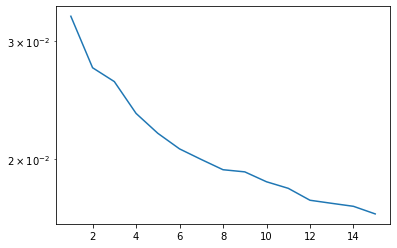

In [50]:
plt.semilogy(range(1,num_iters+1),errs)

In [51]:
errs

[0.03263056372495443,
 0.027353845246710196,
 0.026087114767877284,
 0.02339365270070104,
 0.021853761408598238,
 0.02071655673165046,
 0.019977825489041423,
 0.019289458487248057,
 0.01914846187867647,
 0.018509830336075173,
 0.018099063125084303,
 0.017374367787361122,
 0.01719247574129379,
 0.017017000718948405,
 0.016579779624886715]

## Confirmation of Hand Calculation

In [24]:
x = [0, 1, 1, 0, 3, 4, 6, -1, 0, 1]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
z = 0

for i in np.argwhere(x):
  z += y[i.item()]

print(z)


41


In [8]:
X = np.array([[1, 2, 1], 
              [3, 0, 2], 
              [1, 1, 4]])

W = np.array([[1, 2],
              [0, 1],
              [2, 1]])

H = np.array([[1, 1, 3],
              [0, 2, 2]])

X_approx = W@H
res_mat = np.abs(X - X_approx)
new_W = np.zeros(np.shape(W))

m = 3
n = 3
k = 2

s = 2
t = 0

for s in range(m):
    for t in range (k):
        denom1 = 0
        term2 = 0
        #for j in np.argwhere(res_mat[s,:]):
        #    denom1 += (X_approx[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        #    term2 += (X[s, j.item()]*H[t, j.item()])/res_mat[s, j.item()]
        denom1 = np.sum((X_approx[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        term2 = np.sum((X[s, np.argwhere(res_mat[s,:])]*H[t, np.argwhere(res_mat[s,:])])/res_mat[s, np.argwhere(res_mat[s,:])])
        new_W[s, t] = (W[s, t]/denom1)*(term2)

print(new_W)



[[0.22580645 0.58823529]
 [0.         0.        ]
 [0.92857143 0.4       ]]


In [4]:
X_approx[s,np.argwhere(res_mat[s,:])]

array([[2],
       [4],
       [8]])

entry 2 1 equals zero.


In [6]:
t

1

In [ ]:
#test changes